In [118]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg

In [120]:
data = pd.read_csv('/content/DownloadFestival1.dat', sep='\t')
print(data.head())

   ticknumb  gender  day1  day2  day3
0      2111    Male  2.64  1.35  1.61
1      2229  Female  0.97  1.41   .29
2      2338    Male  0.84            
3      2384  Female  3.03            
4      2401  Female  0.88   .08      


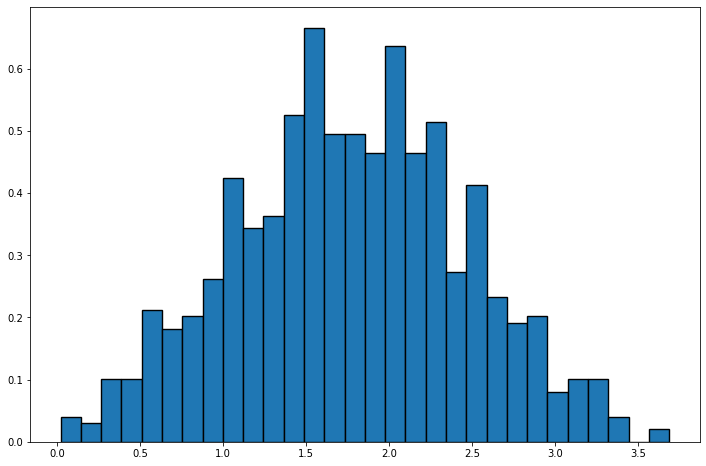

In [130]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = plt.hist(data['day1'],density=True,bins=30, edgecolor='black', linewidth=1.4)
plt.show()

In [124]:
mean1 = data['day1'].mean()
sd1 = data['day1'].std()
n1 = data['day1'].count()
x = np.random.normal(mean1, sd1 ,size=n1)

In [125]:
day2 = data[data['day2']!=' ']
day3 = data[data['day3']!=' ']
day2['day2']=pd.to_numeric(day2['day2'])
day3['day3']=pd.to_numeric(day3['day3'])

In [126]:
day2['theoritical_normal'] = np.random.normal( day2['day2'].mean(), day2['day2'].std(), day2['day2'].count())
day3['theoritical_normal'] = np.random.normal( day3['day3'].mean(), day3['day3'].std(), day3['day3'].count())

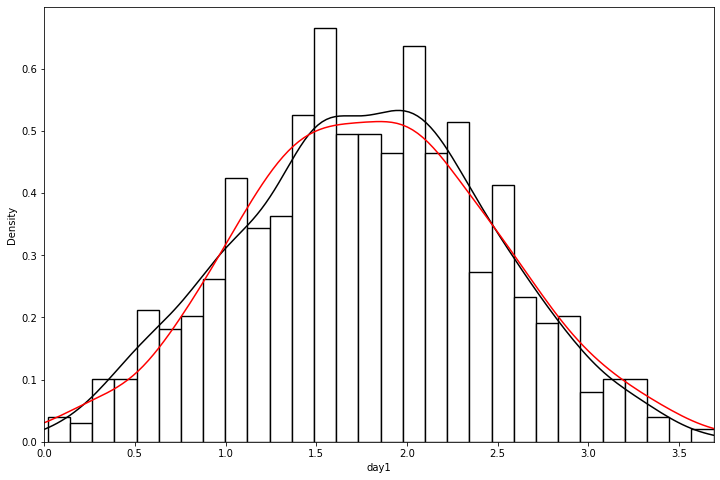

In [131]:
# Day 1
fig,ax = plt.subplots(figsize=(12, 8))
ax = plt.hist(data['day1'],density=True,bins=30, edgecolor='black', color='white', linewidth=1.4)
ax = sns.kdeplot(data['day1'], color='black')
ax = sns.kdeplot(x, color='red')
ax = plt.xlim([0,data['day1'].max() ])
plt.show()

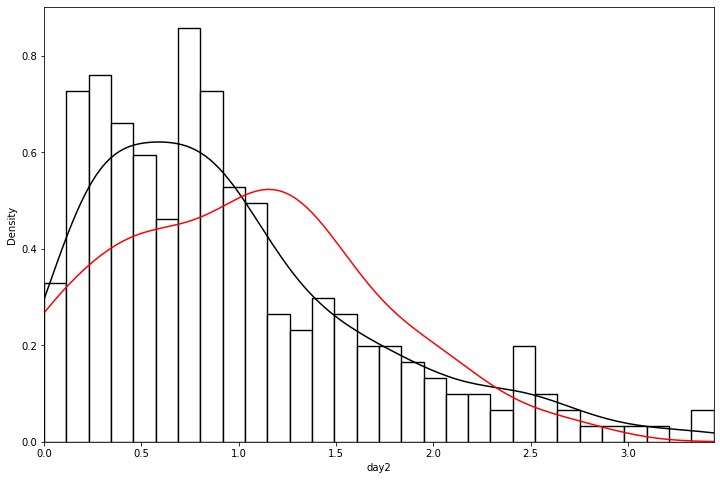

In [133]:
# Day 2
fig,ax = plt.subplots(figsize=(12, 8))
ax = plt.hist(day2['day2'],density=True,bins=30, edgecolor='black', color='white', linewidth=1.4)
ax = sns.kdeplot(day2['day2'], color='black')
ax = sns.kdeplot(day2['theoritical_normal'], color='red')
ax = plt.xlim([0,day2['day2'].max() ])
plt.show()

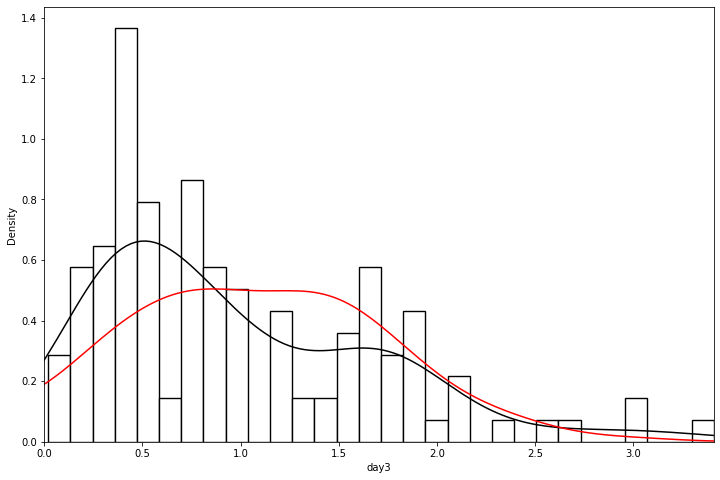

In [134]:
# Day 3
fig,ax = plt.subplots(figsize=(12, 8))
ax = plt.hist(day3['day3'],density=True,bins=30, edgecolor='black', color='white', linewidth=1.4)
ax = sns.kdeplot(day3['day3'], color='black')
ax = sns.kdeplot(day3['theoritical_normal'], color='red')
ax = plt.xlim([0,day3['day3'].max() ])
plt.show()

## Some QQplots

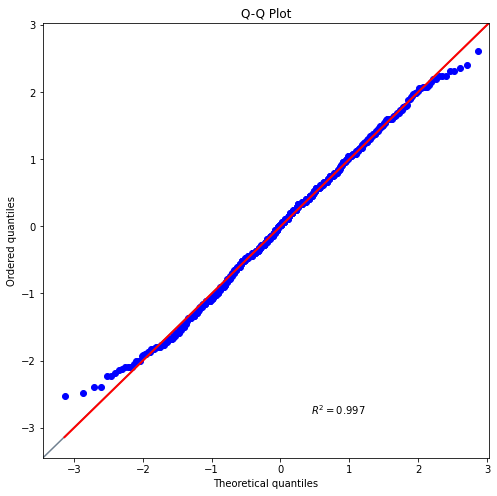

In [154]:
fig,ax = plt.subplots(figsize=(8,8))
_ = pg.qqplot(data['day1'], ax=ax, confidence=False)
plt.show()

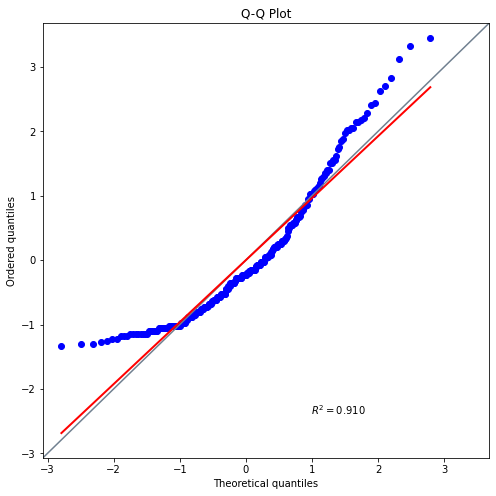

In [155]:
fig,ax = plt.subplots(figsize=(8,8))
_ = pg.qqplot(day2['day2'], ax=ax, confidence=False)
plt.show()

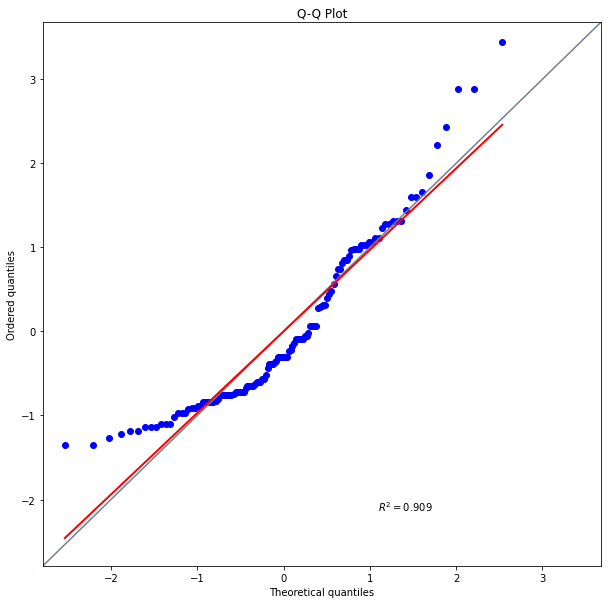

In [156]:
fig,ax = plt.subplots(figsize=(10,10))
_ = pg.qqplot(day3['day3'], ax=ax, confidence=False)
plt.show()

## Some descriptive stats

In [158]:
print(stats.describe(data['day1']))
print(stats.describe(day2['day2']))
print(stats.describe(day3['day3']))

DescribeResult(nobs=810, minmax=(0.02, 3.69), mean=1.7711358024691357, variance=0.48099623617024523, skewness=-0.00443656365418462, kurtosis=-0.41521580822691284)
DescribeResult(nobs=264, minmax=(0.0, 3.44), mean=0.960909090909091, variance=0.519523885240235, skewness=1.0889928045068633, kurtosis=0.7840744644581563)
DescribeResult(nobs=123, minmax=(0.02, 3.41), mean=0.9765040650406502, variance=0.5044934159669465, skewness=1.0202292321949304, kurtosis=0.6537138945078094)


In [159]:
print(data['day1'].describe())

count    810.000000
mean       1.771136
std        0.693539
min        0.020000
25%        1.312500
50%        1.790000
75%        2.230000
max        3.690000
Name: day1, dtype: float64


In [160]:
print(day2['day2'].describe())

count    264.000000
mean       0.960909
std        0.720780
min        0.000000
25%        0.410000
50%        0.790000
75%        1.350000
max        3.440000
Name: day2, dtype: float64


In [161]:
print(day3['day3'].describe())

count    123.000000
mean       0.976504
std        0.710277
min        0.020000
25%        0.440000
50%        0.760000
75%        1.525000
max        3.410000
Name: day3, dtype: float64
